In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
netflix = pd.read_csv('D:/Case Study/Netflix/netflix.csv')

In [6]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
# Renaming 'listed_in' to 'genre'

netflix.rename(columns = {'listed_in' : 'genre'}, inplace = True)

In [9]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre'],
      dtype='object')

In [10]:
netflix.shape

(8790, 10)

In [11]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [16]:
# To find any duplicates

netflix.duplicated().value_counts()

False    8790
dtype: int64

In [17]:
# Columns with empty values

netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
dtype: int64

In [18]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [19]:
netflix['type'].replace('TV Show', 'Series', inplace = True)


In [20]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,Series,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,Series,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [21]:
# Data Summary

netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [25]:
columns = ['type', 'country', 'rating']


for col in columns:
    print(netflix[col].value_counts())

Movie     6126
Series    2664
Name: type, dtype: int64
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


In [26]:
# Movies and series without a country name.

netflix[netflix.country == 'Not Given']

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,Series,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,1/1/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,9/1/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,8/9/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


In [28]:
netflix['type'].value_counts(normalize = True)

Movie     0.696928
Series    0.303072
Name: type, dtype: float64

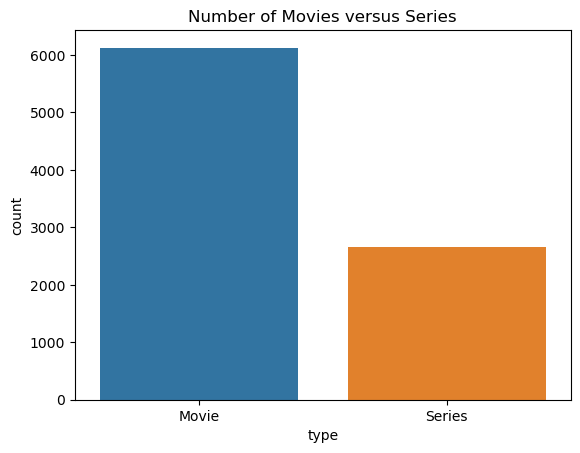

In [29]:
# Number of Movies versus Series 

sns.countplot(data=netflix, x='type')
plt.title('Number of Movies versus Series')
plt.show()

c:\Users\aruna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


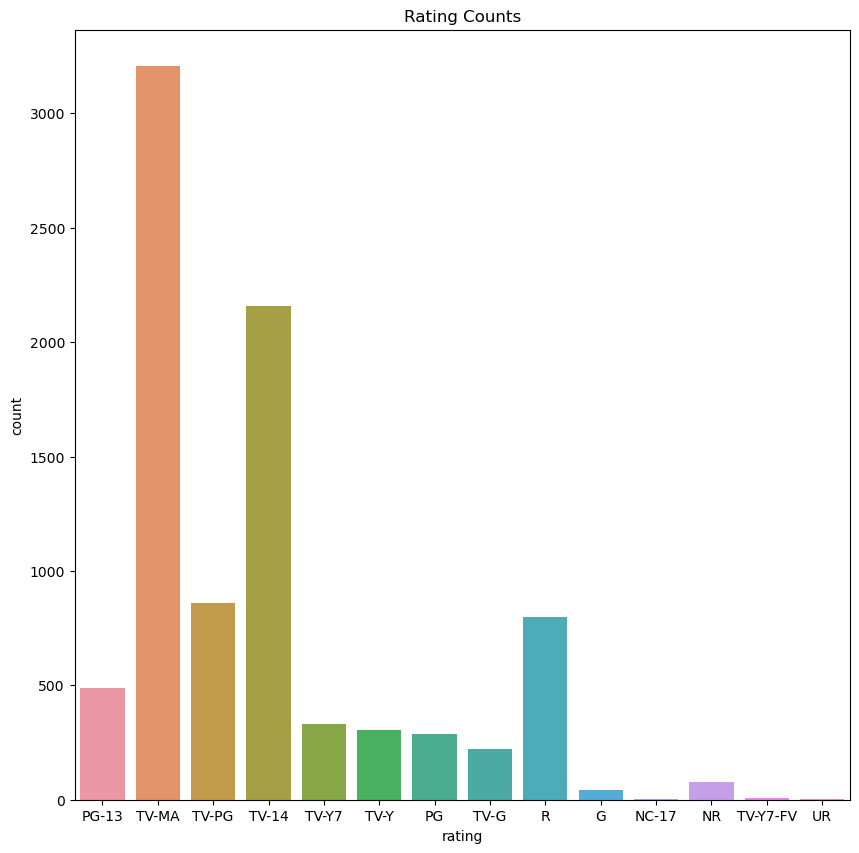

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(netflix['rating'])
plt.title('Rating Counts')
plt.show()

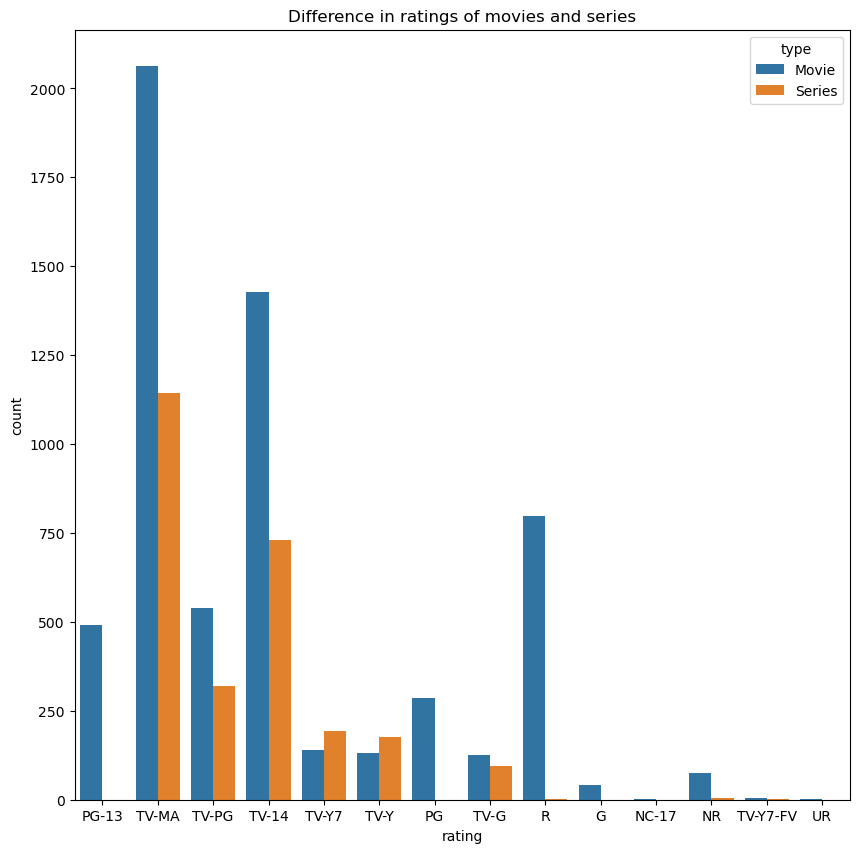

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(data=netflix, x='rating', hue='type')
plt.title('Difference in ratings of movies and series')
plt.show()

In [34]:
# Top 10 countries with the most movies and series

Top_10_countries = netflix['country'].value_counts().drop('Not Given').head(10)
Top_10_countries

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: country, dtype: int64

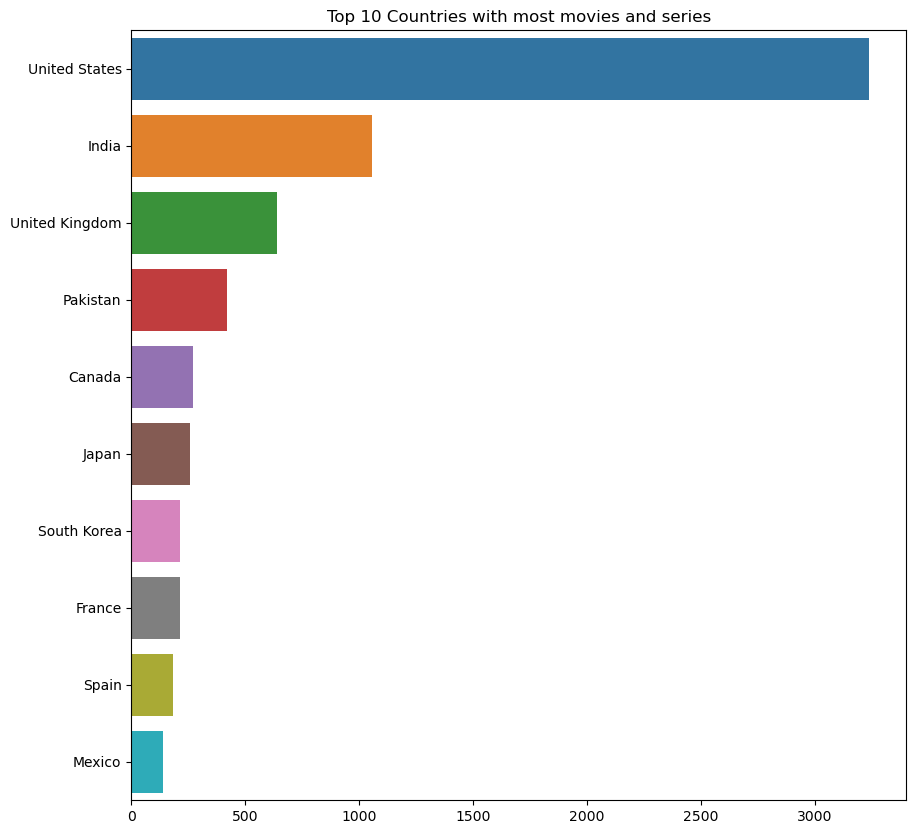

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x=Top_10_countries.values, y=Top_10_countries.index)
plt.title('Top 10 Countries with most movies and series')
plt.show()

In [36]:
# Top 10 ratings of movies and series

Top_10_rating = netflix['rating'].value_counts().head(10)
Top_10_rating

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64

In [37]:
netflix['rating'].value_counts(normalize=True).head(10)


TV-MA    0.364619
TV-14    0.245392
TV-PG    0.097952
R        0.090899
PG-13    0.055745
TV-Y7    0.037884
TV-Y     0.034812
PG       0.032651
TV-G     0.025028
NR       0.008987
Name: rating, dtype: float64

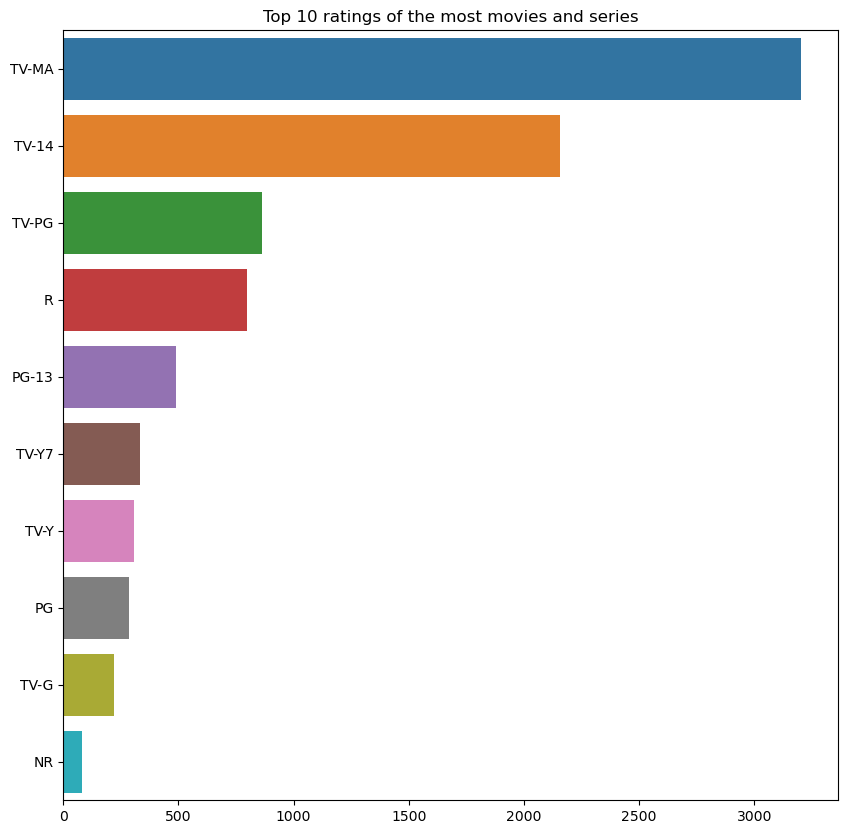

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x=Top_10_rating.values, y=Top_10_rating.index)
plt.title('Top 10 ratings of movies and series')
plt.show()

In [39]:
# top 10 genres

Top_10_genres = netflix['genre'].value_counts().head(10)
Top_10_genres

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: genre, dtype: int64

In [40]:
netflix['genre'].value_counts(normalize=True).head(10)

Dramas, International Movies                        0.041183
Documentaries                                       0.040842
Stand-Up Comedy                                     0.037998
Comedies, Dramas, International Movies              0.031172
Dramas, Independent Movies, International Movies    0.028669
Kids' TV                                            0.024915
Children & Family Movies                            0.024460
Children & Family Movies, Comedies                  0.022867
Documentaries, International Movies                 0.021160
Dramas, International Movies, Romantic Movies       0.020478
Name: genre, dtype: float64

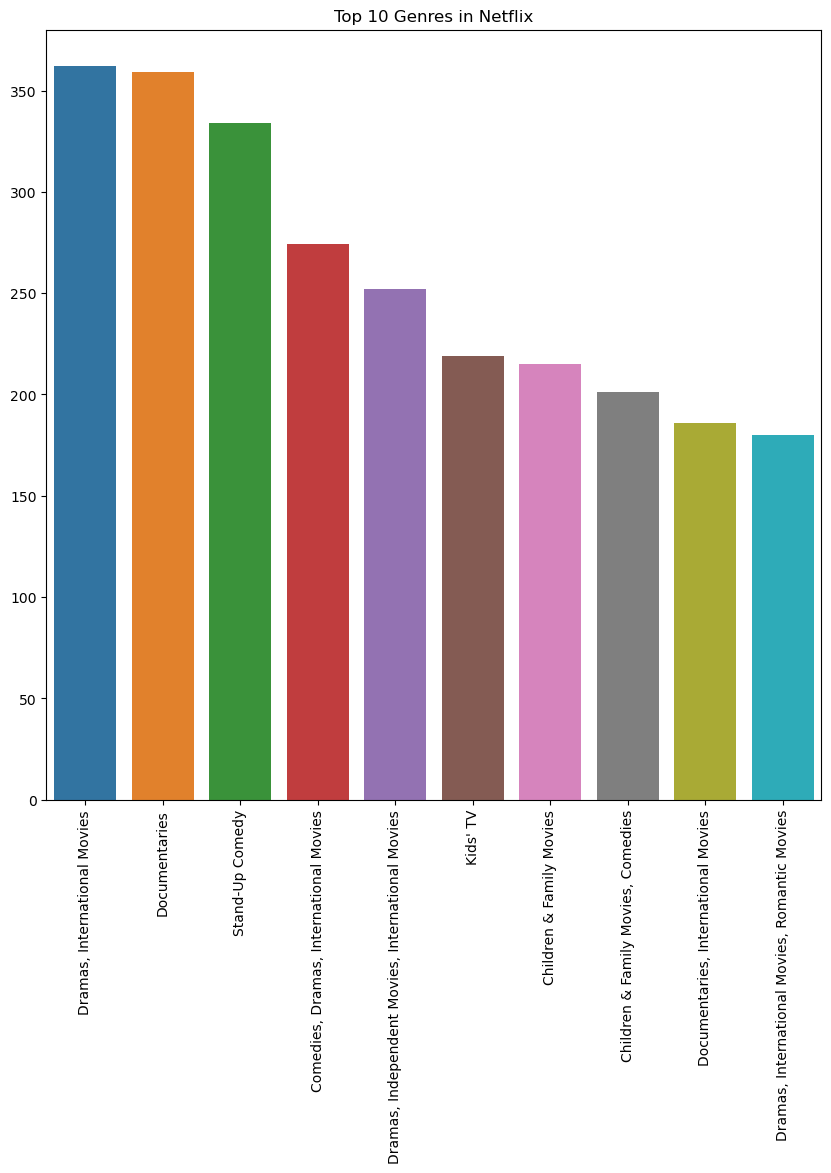

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(y=Top_10_genres.values, x=Top_10_genres.index)
plt.title('Top 10 Genres in Netflix')
plt.xticks(rotation = 90)
plt.show()